In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Task 1: EDA
df = pd.read_csv(r"C:\Users\hp\Downloads\PCA\PCA\wine.csv")
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

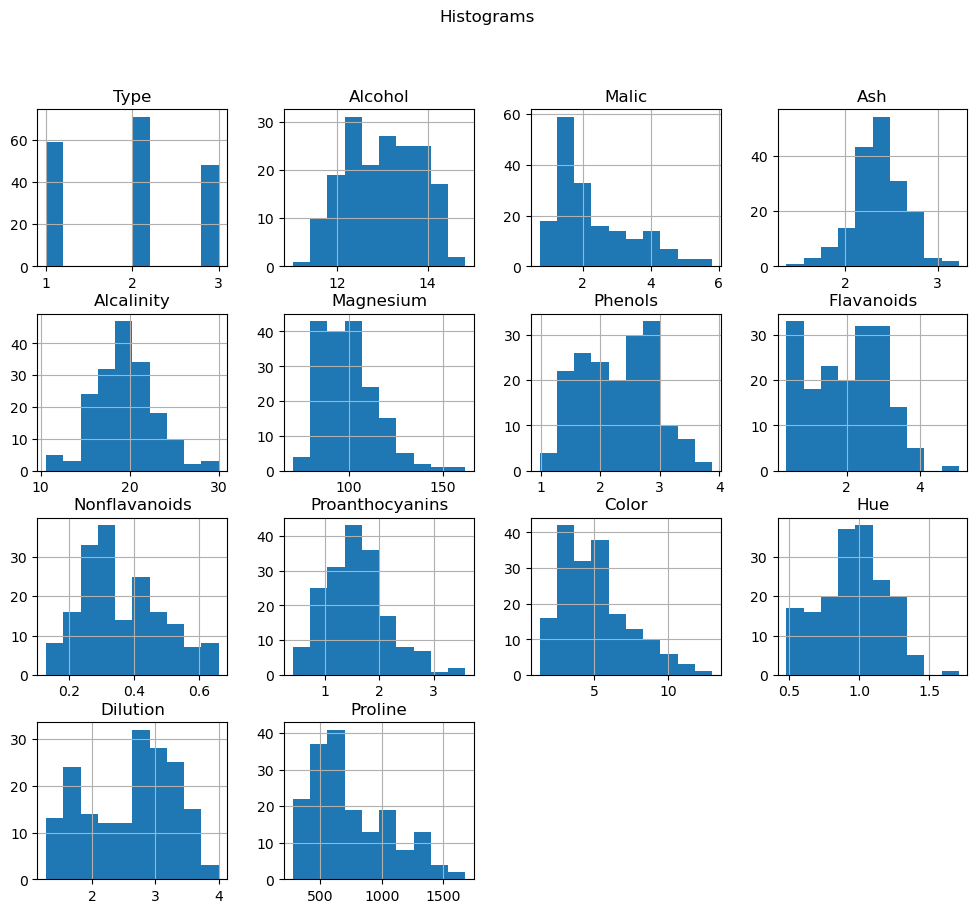

In [3]:
# Histograms
df.hist(figsize=(12, 10))
plt.suptitle("Histograms")
plt.show()

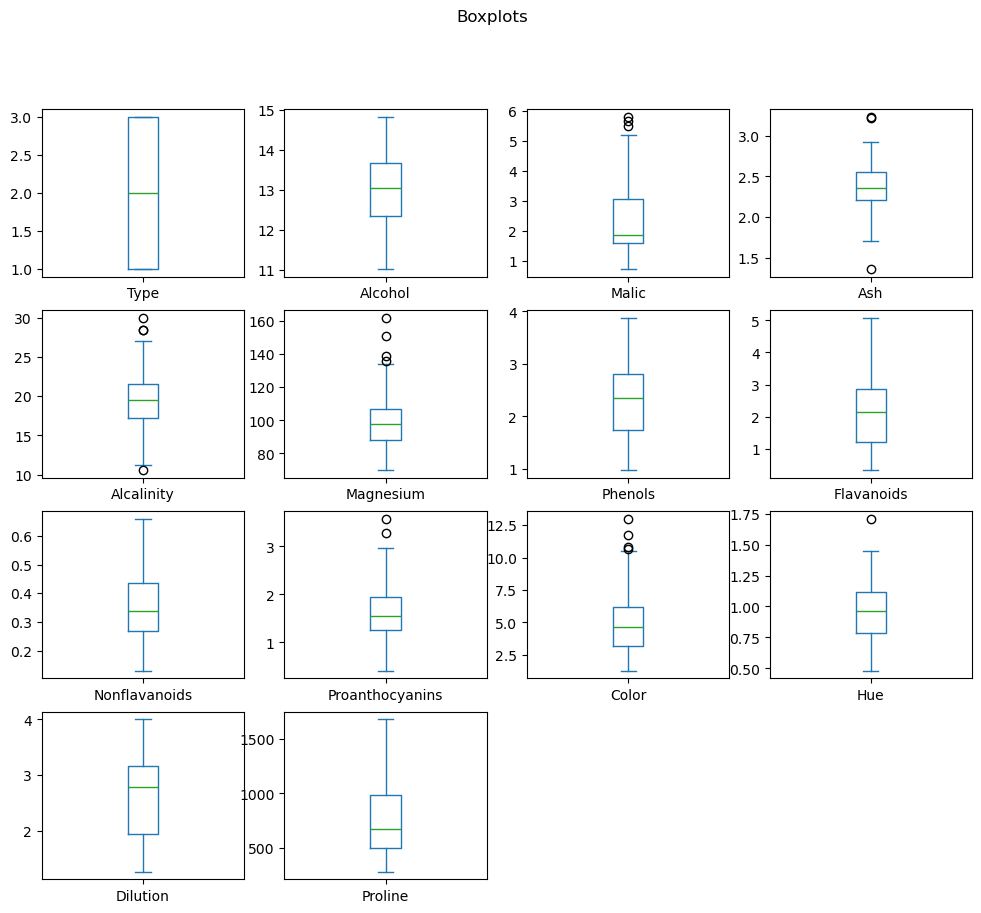

In [4]:
# Boxplots
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,10))
plt.suptitle("Boxplots")
plt.show()

In [5]:
# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop to remove outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep only data within the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Resulting dataframe with outliers removed
print("Data shape after outlier removal:", df.shape)

Data shape after outlier removal: (161, 14)


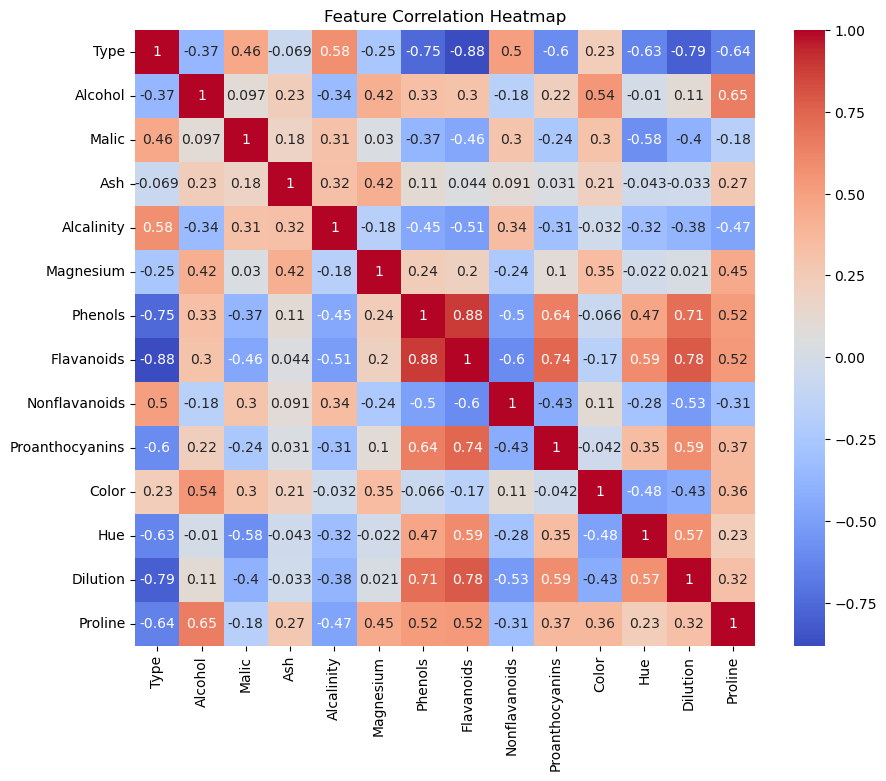

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Create a dictionary to store the mapping
mapping_dict = {}
# Apply label encoding to categorical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in categorical_cols:
    # Apply the encoder and store the mapping
    df[col] = encoder.fit_transform(df[col])
    mapping_dict[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [8]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
# Task 2: PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)
explained_variance = pca.explained_variance_ratio_

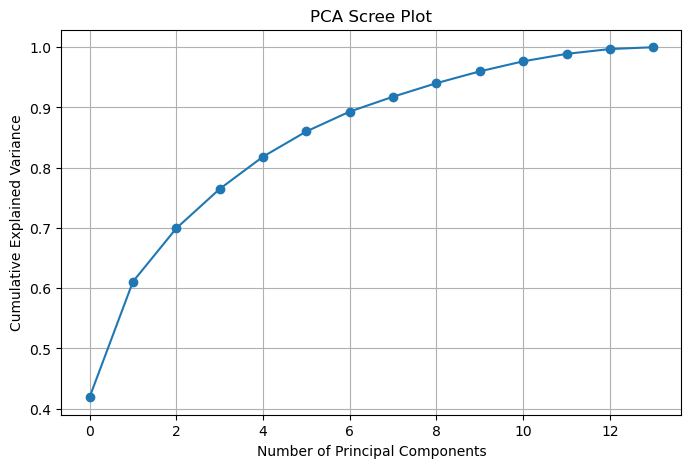

In [11]:
# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot")
plt.grid(True)
plt.show()

In [12]:
# Choose number of components (e.g., retain 95% variance)
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)
print(f"PCA reduced dimensions: {pca_data.shape[1]}")

PCA reduced dimensions: 10


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


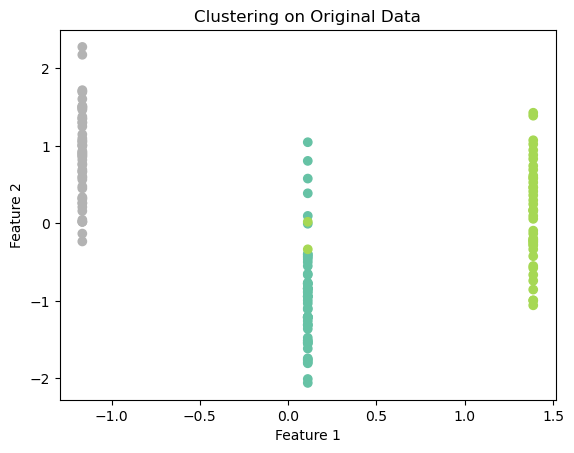

Silhouette Score (Original): 0.32238554513044054
Davies-Bouldin Index (Original): 1.2423126369103799


In [18]:
# Task 3: Clustering on Original Data
kmeans_orig = KMeans(n_clusters=3, random_state=42)
orig_labels = kmeans_orig.fit_predict(scaled_data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=orig_labels, cmap='Set2')
plt.title("Clustering on Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("Silhouette Score (Original):", silhouette_score(scaled_data, orig_labels))
print("Davies-Bouldin Index (Original):", davies_bouldin_score(scaled_data, orig_labels))


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


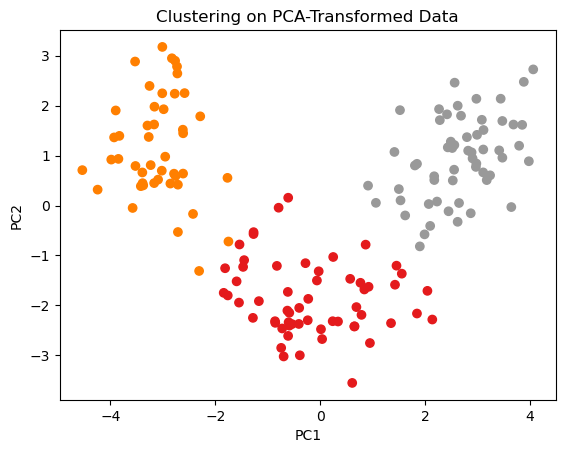

Silhouette Score (PCA): 0.3391333563936087
Davies-Bouldin Index (PCA): 1.188162132364804


In [19]:
# Task 4: Clustering on PCA Data
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_labels = kmeans_pca.fit_predict(pca_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=pca_labels, cmap='Set1')
plt.title("Clustering on PCA-Transformed Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Silhouette Score (PCA):", silhouette_score(pca_data, pca_labels))
print("Davies-Bouldin Index (PCA):", davies_bouldin_score(pca_data, pca_labels))


In [20]:
# Task 5: Comparison and Analysis
from sklearn.metrics import davies_bouldin_score, silhouette_score
print("\n--- Comparison ---")
print(f"Silhouette Score - Original: {silhouette_score(scaled_data, orig_labels)}")
print(f"Silhouette Score - PCA: {silhouette_score(pca_data, pca_labels)}")
print(f"Davies-Bouldin - Original: {davies_bouldin_score(scaled_data, orig_labels)}")
print(f"Davies-Bouldin - PCA: {davies_bouldin_score(pca_data, pca_labels)}")


--- Comparison ---
Silhouette Score - Original: 0.32238554513044054
Silhouette Score - PCA: 0.3391333563936087
Davies-Bouldin - Original: 1.2423126369103799
Davies-Bouldin - PCA: 1.188162132364804


In [21]:
print("""
Conclusion:
- PCA reduced dimensionality from {} to {} features while retaining ~95% of variance.
- Clustering on PCA data is generally faster and may avoid overfitting.
- Depending on the dataset, clustering performance (silhouette/Davies-Bouldin) may improve with PCA, but some interpretability may be lost.
""".format(scaled_data.shape[1], pca_data.shape[1]))


Conclusion:
- PCA reduced dimensionality from 14 to 10 features while retaining ~95% of variance.
- Clustering on PCA data is generally faster and may avoid overfitting.
- Depending on the dataset, clustering performance (silhouette/Davies-Bouldin) may improve with PCA, but some interpretability may be lost.

